Hierarchical Clustering as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#Lets build clusters
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

Panel data with sales volume for a package of Borden Sliced Cheese as well as a measure of display activity and price. Weekly data aggregated to the "key" account or retailer/market level.

A data frame with 5555 observations on the following 4 variables:

...$RETAILER	a list of 88 retailers

...$VOLUME	unit sales

...$DISP	percent ACV on display (a measure of advertising display activity)

...$PRICE	in U.S. dollars

In [3]:
#import CSV file
df=pd.read_csv('Cheese.csv')
df.head()
df.shape
print()

#Aggregate infromation at the store level
df_pivot = pd.pivot_table(df,values=['VOLUME','DISP','PRICE'], index='RETAILER', aggfunc=np.median)
df_pivot.head()
df_pivot.shape

,RETAILER,VOLUME,DISP,PRICE
1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
3,LOS ANGELES - VONS,17302,0.102000,2.711421
4,CHICAGO - DOMINICK,13561,0.027591,2.651206
5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 4)

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [4]:
#Scale all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler 
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld, columns=df_pivot.columns)
df_scld.head()
df_scld.describe()
df_scld.shape

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


(88, 3)

In [5]:
dist = linkage(df_scld,'ward')
type(dist)
dist.shape
dist[0:4]

numpy.ndarray

(87, 4)

array([[5.70000000e+01, 8.50000000e+01, 1.89857462e-02, 2.00000000e+00],
       [0.00000000e+00, 8.20000000e+01, 2.16806904e-02, 2.00000000e+00],
       [2.20000000e+01, 2.60000000e+01, 2.16823987e-02, 2.00000000e+00],
       [9.00000000e+00, 3.90000000e+01, 3.62917719e-02, 2.00000000e+00]])

The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [12.5, 12.5, 57.5, 57.5],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [111.875, 111.875, 163.75, 163.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [137.8125, 137.8125, 217.5, 217.5],
  [35.0, 35.0, 177.65625, 177.65625],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [293.75, 293

Text(0, 0.5, 'Distance')

<function matplotlib.pyplot.show(*args, **kw)>

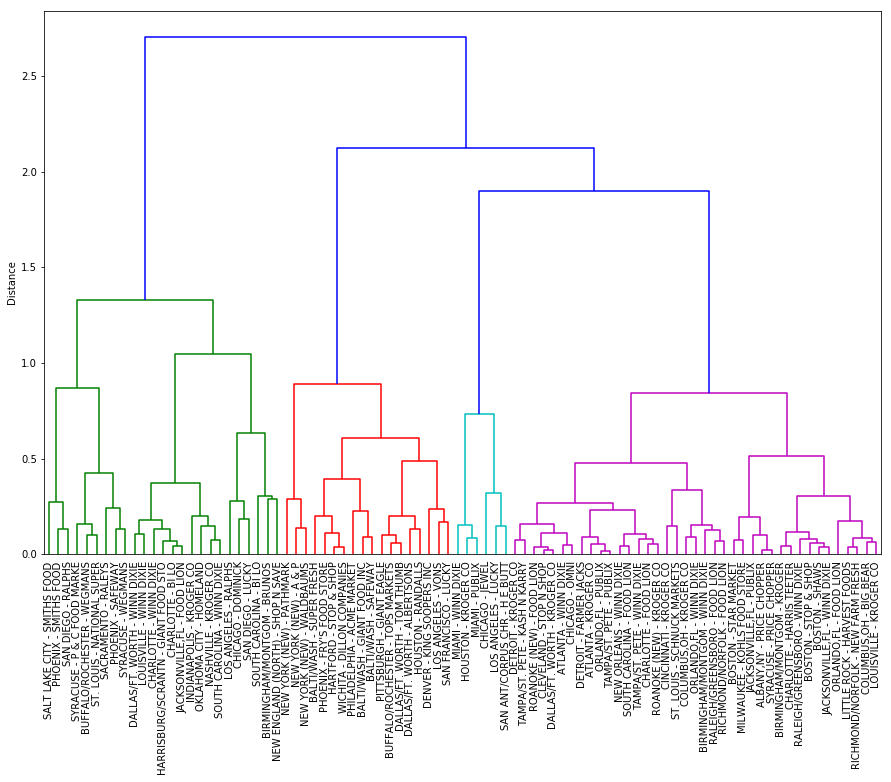

In [6]:
#Find out the right numbers of clusters
fig = plt.figure(figsize=(15,10))
dendrogram(dist,orientation='top', distance_sort='descending', show_leaf_counts=True,
           labels=df_pivot.index, leaf_font_size=10,leaf_rotation=90)
plt.xlabel=('Cluster')
plt.ylabel('Distance')
# show the figure
plt.show
# save the figure to file
#fig.savefig('dendrogram.png') 
# close the figure
#plt.close(fig)   

In [7]:
# Show cluster membership
lbl = fcluster(dist,1.5, criterion = 'distance')
type(lbl)
print(lbl)

numpy.ndarray

[4 4 4 2 2 2 1 4 4 4 4 4 2 1 1 4 4 1 1 3 4 4 4 4 4 2 4 2 1 2 4 4 1 2 3 2 1
 1 4 4 4 3 1 2 4 1 3 3 4 1 1 4 2 2 2 1 4 4 4 2 2 1 1 2 4 4 4 4 4 4 1 1 3 1
 1 2 1 4 1 1 4 1 4 1 4 4 4 2]


In [8]:
df_pivot.reset_index(level=0, inplace=True)
df_pivot.head()
df_pivot.tail()
df_pivot.shape

,RETAILER,DISP,PRICE,VOLUME
0,"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
1,ATLANTA - KROGER CO,0.030872,2.701700,4455.0
2,ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
3,BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
4,BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


,RETAILER,DISP,PRICE,VOLUME
83,SYRACUSE - WEGMANS,0.227423,3.459383,807.0
84,TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0
85,TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0
86,TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0
87,WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5


(88, 4)

In [9]:
df_pivot['Cluster']=lbl
df_pivot.head()
df_pivot.tail()
df_pivot.shape

,RETAILER,DISP,PRICE,VOLUME,Cluster
0,"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,4
1,ATLANTA - KROGER CO,0.030872,2.701700,4455.0,4
2,ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,4
3,BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,2
4,BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,2


,RETAILER,DISP,PRICE,VOLUME,Cluster
83,SYRACUSE - WEGMANS,0.227423,3.459383,807.0,1
84,TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,4
85,TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,4
86,TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,4
87,WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,2


(88, 5)

In [10]:
#Generate pivot table for 'VOLUME','DISP','PRICE' with mean of allaganist each clusters
clust_profile = pd.pivot_table(df_pivot, values=['VOLUME','DISP','PRICE'], index='Cluster', aggfunc=np.mean)
np.round(clust_profile,2)

,DISP,PRICE,VOLUME
Cluster,,,
1,0.22,2.82,3371.52
2,0.04,3.64,3431.00
3,0.06,2.82,11512.67
4,0.03,2.64,3479.58


<Figure size 720x576 with 0 Axes>

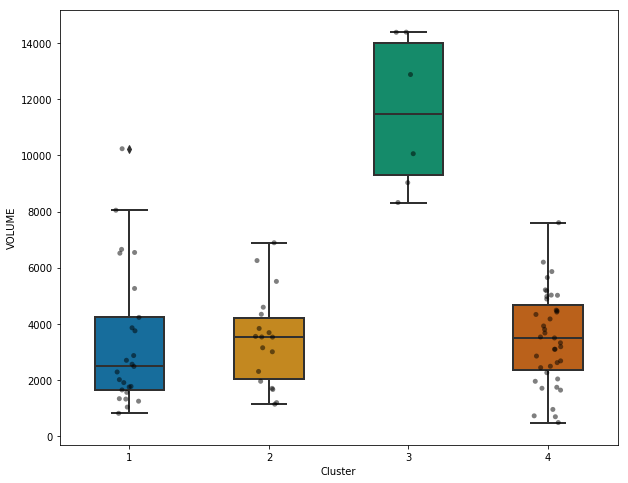

In [11]:
#Plot a graph with Volume and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='VOLUME',width=0.5,palette="colorblind",  data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='VOLUME',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

With above plot graph came to conclusion that in cluster 3 volume of the cheeder cheese sale is more as compare to other clusters. Also the number of stores seems to be less in cluster 3 compare to other clusters.

<Figure size 720x576 with 0 Axes>

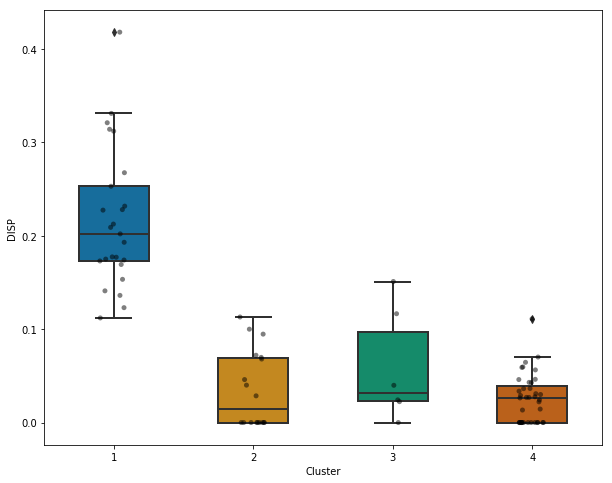

In [12]:
#Plot a graph with DISP and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='DISP', width=0.5,palette="colorblind", data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='DISP',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

Cluster No.1 has more number of stores investing more on advertising display activity comparing to other cluster stores.

<Figure size 720x576 with 0 Axes>

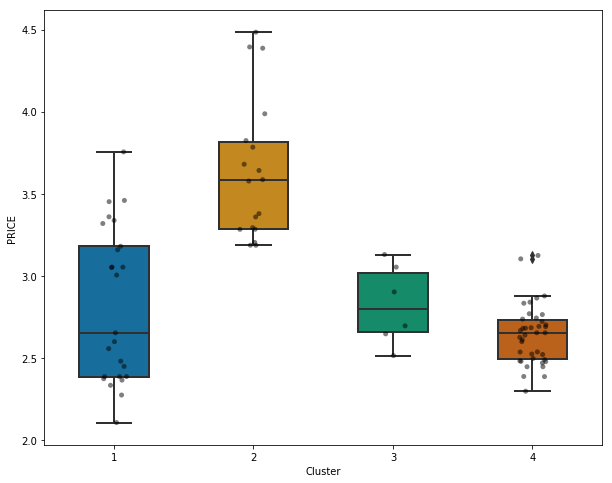

In [13]:
#Plot a graph with PRICE and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='PRICE',  width=0.5,palette="colorblind",data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='PRICE',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

Price wise i can see cluster no: 2 stores charge more compating to other cluster stores while cluster No:1 has less prices for similar type of cheese.

In [14]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Ward)')

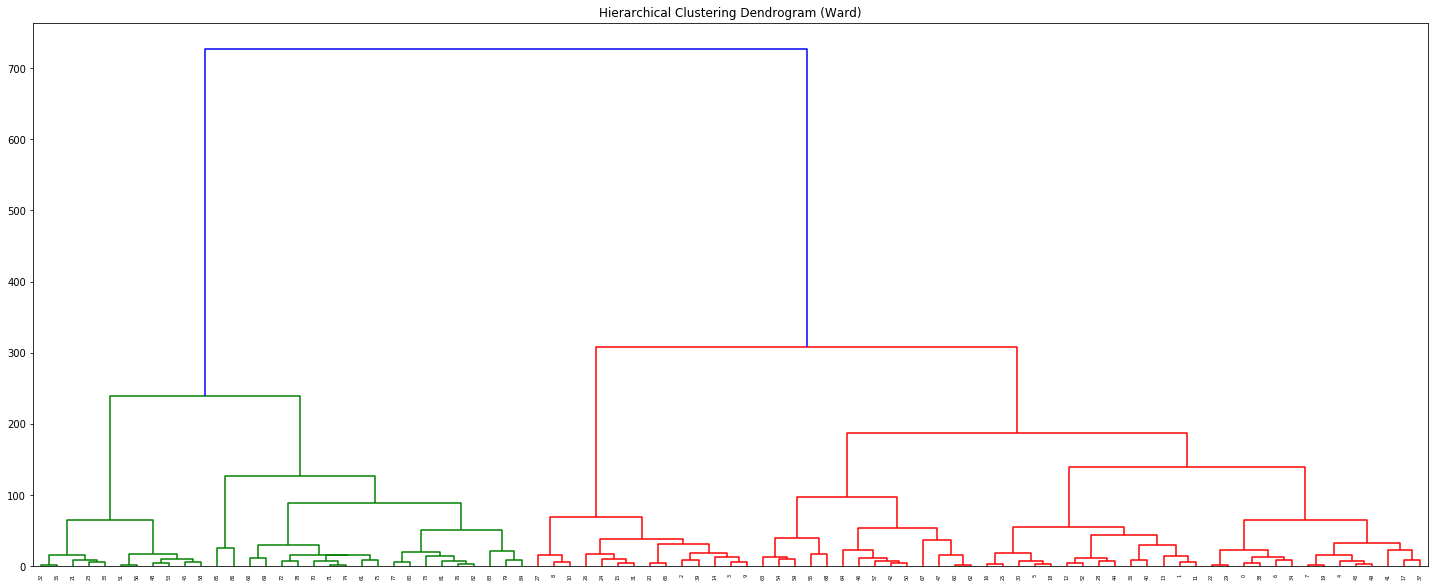

In [15]:
# create dendrogram
plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(dist, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.show()

create clusters Agglomerative Clustering Recursively merges the pair of clusters that minimally increases a given linkage distance

In [16]:
clustering = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# Train model
model = clustering.fit_predict(dist)

clustering.labels_

array([0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3,
       0, 3, 2, 0, 2, 2, 0, 0, 0, 2, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 2,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

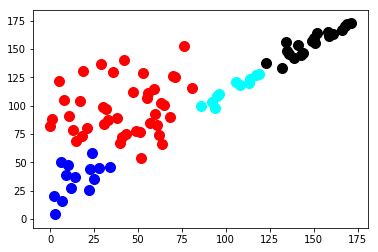

In [17]:
#Generate scatter plot aganist each clusters using Agglomerative Clustering
plt.scatter(dist[model ==0,0], dist[model == 0,1], s=100, c='red')
plt.scatter(dist[model==1,0], dist[model == 1,1], s=100, c='black')
plt.scatter(dist[model ==2,0], dist[model == 2,1], s=100, c='blue')
plt.scatter(dist[model ==3,0], dist[model == 3,1], s=100, c='cyan')

In this plot, the dots denote which cluster each observation has been assigned to.

The colours denote the original class.

I think you will agree that the clustering has done a pretty decent job and there are a few outliers.